In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
import re

In [2]:
df = pd.read_csv("train_star.csv")
print(df.shape)
print(df.isnull().sum())
data = pd.read_csv("test_star.csv")
data.shape

(20732, 7)
Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64


(18820, 6)

In [3]:
features1 = ['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag']
target = ['TargetClass']
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.99,7.92,1.61,0.646,G5/G6V,19.483625,Giant
1,10.86,3.26,2.12,1.840,M1V:,18.426088,Giant
2,8.83,7.57,1.05,0.461,F3V,18.225480,Giant
3,7.72,24.80,0.89,0.613,G3IV,19.692257,Giant
4,8.81,3.17,1.03,0.872,G6III,16.315296,Dwarf


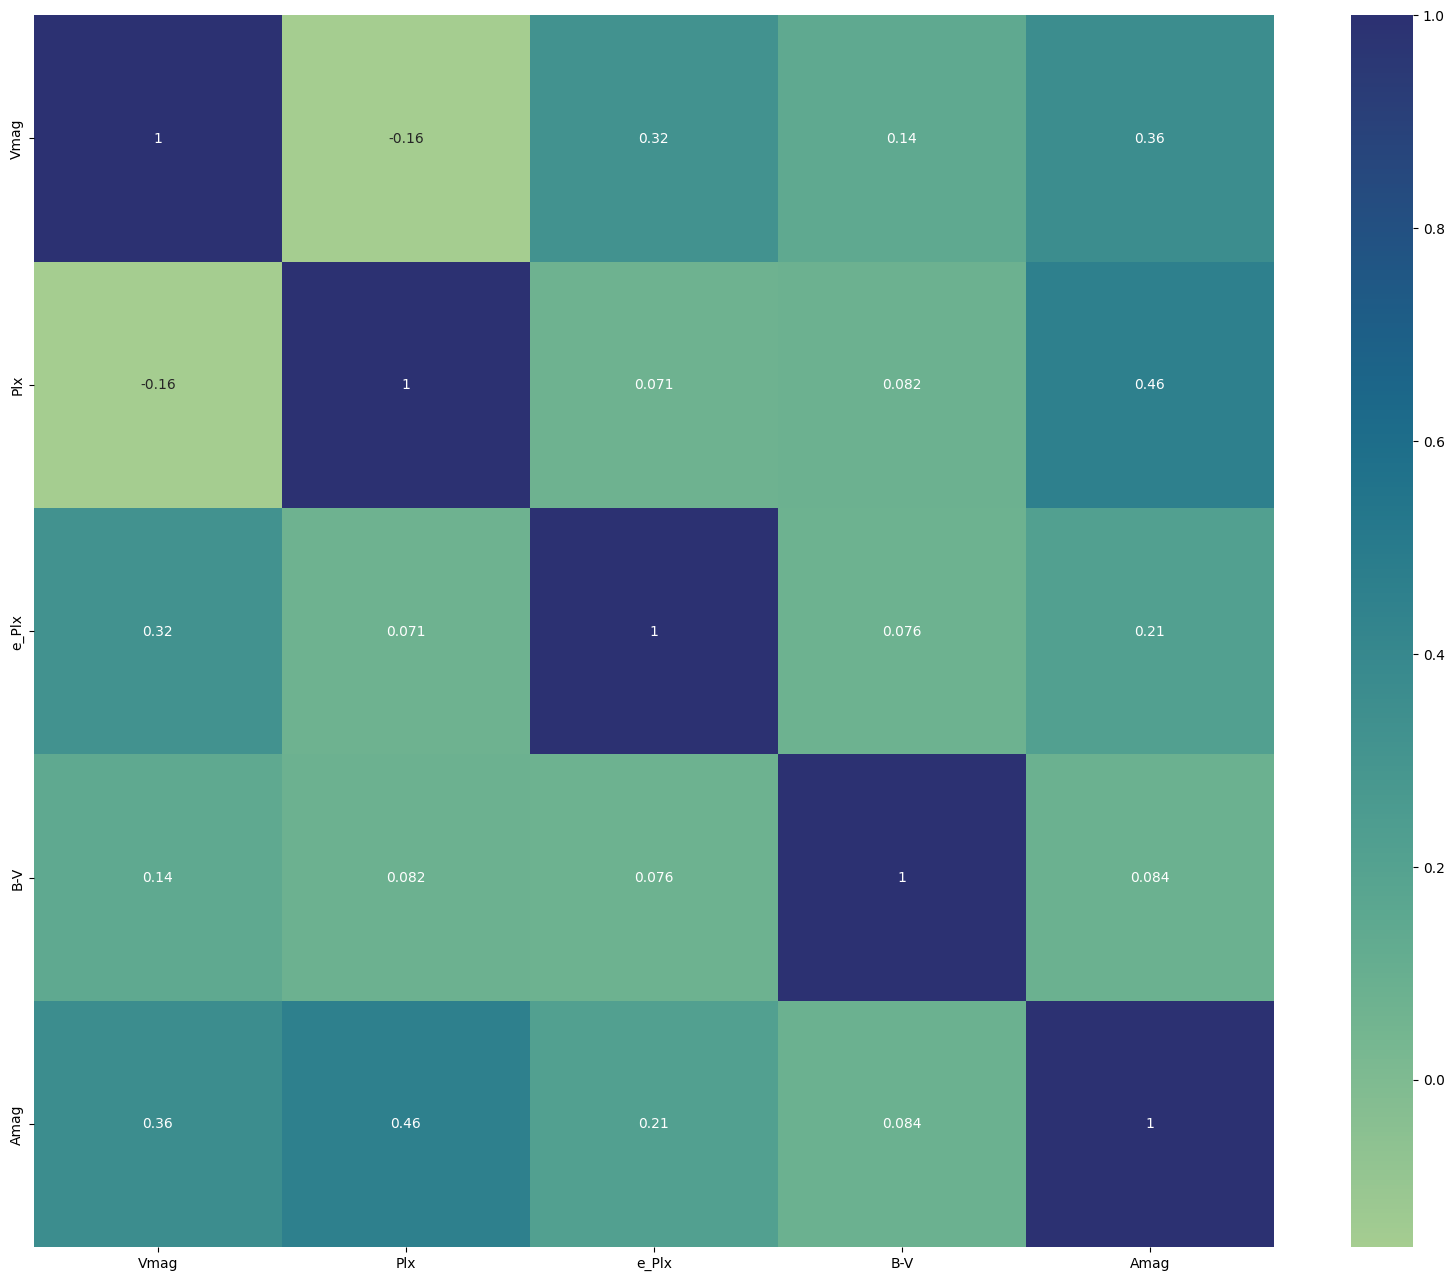

In [6]:
corr = df[features1].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap="crest")
plt.show()

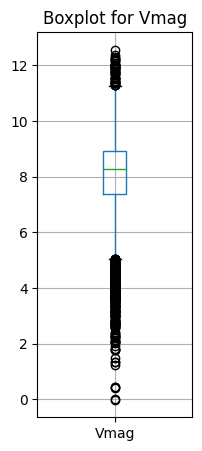

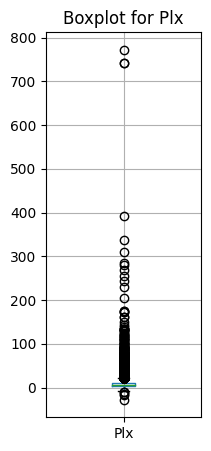

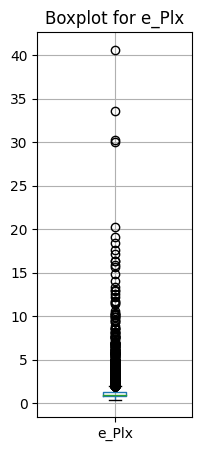

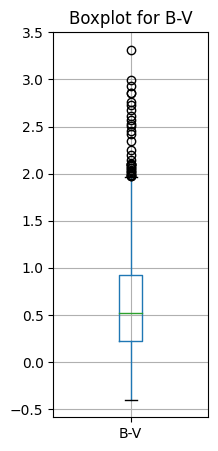

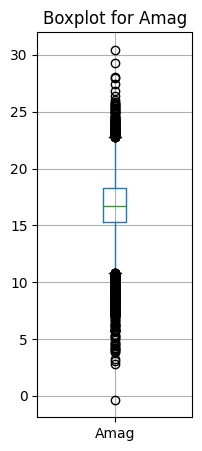

In [7]:
for feature in features1:
    df.boxplot(column=feature, figsize=(2, 5))
    plt.title(f'Boxplot for {feature}')
    plt.show()

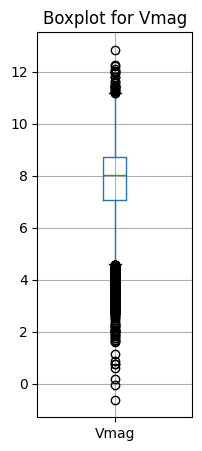

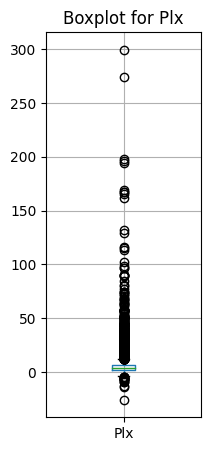

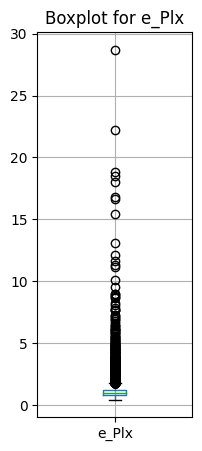

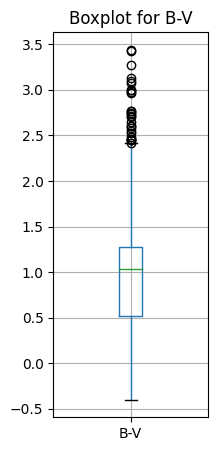

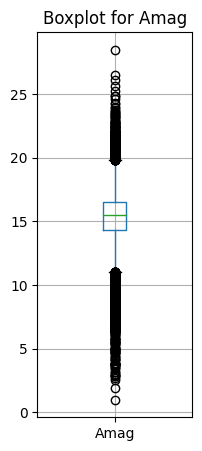

In [8]:
for feature in features1:
    data.boxplot(column=feature, figsize=(2, 5))
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [9]:
symbols = ['G', 'M', 'F', 'O', 'B', 'A', 'K', '0', 'Ia', 'Iab', 'Ib', 'II', 'III', 'IV', 'V']

for symbol in symbols:
    df[symbol] = df['SpType'].apply(lambda x: 1 if symbol in x else 0)

df

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,G,M,F,...,A,K,0,Ia,Iab,Ib,II,III,IV,V
0,9.99,7.92,1.61,0.646,G5/G6V,19.483625,Giant,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10.86,3.26,2.12,1.840,M1V:,18.426088,Giant,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.83,7.57,1.05,0.461,F3V,18.225480,Giant,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,7.72,24.80,0.89,0.613,G3IV,19.692257,Giant,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,8.81,3.17,1.03,0.872,G6III,16.315296,Dwarf,1,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20727,7.07,14.88,0.90,0.586,F8V,17.933014,Giant,0,0,1,...,0,0,0,0,0,0,0,0,0,1
20728,9.11,4.71,0.87,0.485,F5V,17.475105,Giant,0,0,1,...,0,0,0,0,0,0,0,0,0,1
20729,9.69,1.61,1.56,0.384,A2/A3IV,15.724129,Giant,0,0,0,...,1,0,0,0,0,0,0,0,1,1
20730,8.06,37.33,0.97,0.758,K1V,20.920290,Giant,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [10]:
feat = df.drop(columns=['TargetClass', 'SpType']).columns
feat

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag', 'G', 'M', 'F', 'O', 'B', 'A',
       'K', '0', 'Ia', 'Iab', 'Ib', 'II', 'III', 'IV', 'V'],
      dtype='object')

In [11]:
for symbol in symbols:
    data[symbol] = data['SpType'].apply(lambda x: 1 if symbol in x else 0)

data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,G,M,F,O,...,A,K,0,Ia,Iab,Ib,II,III,IV,V
0,7.91,6.33,1.01,0.843,G5III,16.917019,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,7.35,1.30,0.53,1.304,K1/K2III,12.919716,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,6.75,8.01,0.84,1.019,K1III,16.268162,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,4.47,7.03,0.72,1.283,K4III,13.704777,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,7.33,2.45,1.14,1.600,K5III,14.275830,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18815,7.72,2.41,1.05,1.487,K4III,14.630085,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
18816,8.27,1.98,0.81,1.005,K0III,14.753326,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
18817,8.53,1.14,0.89,-0.093,B7/B8III,13.814524,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
18818,9.09,6.41,1.10,0.480,F6V,18.124290,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
scaler = StandardScaler()


df[features1] = scaler.fit_transform(df[features1])
df.head()
scaler = StandardScaler()


data[features1] = scaler.fit_transform(data[features1])
data.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,G,M,F,O,...,A,K,0,Ia,Iab,Ib,II,III,IV,V
0,0.095828,0.128646,-0.071732,-0.149717,G5III,0.674653,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,-0.333283,-0.494553,-0.803711,0.744592,K1/K2III,-1.065358,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,-0.793045,0.336793,-0.330975,0.191711,K1III,0.392208,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,-2.540141,0.215374,-0.513969,0.703853,K4III,-0.723624,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,-0.348609,-0.352072,0.126512,1.318812,K5III,-0.475047,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [13]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['TargetClass'])
df['TargetClass'] = label_encoder.transform(df['TargetClass'])

In [14]:
X_train, Y_train = df[feat], df[target]

In [15]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
print(model.coef_)

[[ 6.76333950e-02  4.92877864e-01 -2.71521449e-02 -8.28265361e-01
   4.69106269e-01  5.06660509e-01  8.70886054e-03  3.15909555e-01
  -1.53552784e-01 -4.01195687e-01  2.33609496e-01  3.07868870e-01
  -2.00781025e-01 -1.22614440e+00 -4.37770342e-01 -1.40783103e+00
  -3.00676617e+00 -1.21782851e+00  3.08809884e+00  9.00493049e+00]]


In [ ]:
'''predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))'''

'predictions = model.predict(X_test)\nprint(classification_report(Y_test, predictions))\nprint(confusion_matrix(Y_test, predictions))'

In [17]:
model52 = RandomForestClassifier(random_state=42)
model52.fit(X_train, Y_train)

<ipython-input-17-a6e1224dd209>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model52.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [ ]:
'''predictions52 = model52.predict(X_test)
print(classification_report(Y_test, predictions52))
print(confusion_matrix(Y_test, predictions52))'''

'predictions52 = model52.predict(X_test)\nprint(classification_report(Y_test, predictions52))\nprint(confusion_matrix(Y_test, predictions52))'

V: 0.39545946976884055
II: 0.19785167009573432
III: 0.18814053192919167
B-V: 0.07490609849929089
IV: 0.05484270416109428
K: 0.03704257526981375
Amag: 0.01607562753886774
Plx: 0.009885957413225156
Ib: 0.006521102247456493
Ia: 0.004580793876641926
M: 0.0030229418329151174
F: 0.0029557056633310315
Vmag: 0.002563026422832345
e_Plx: 0.0018520632780027312
A: 0.0017691949222474372
Iab: 0.0017016979028036275
G: 0.00038213154730537254
B: 0.00021713966377128412
0: 0.0001646987473897583
O: 6.486921924458384e-05


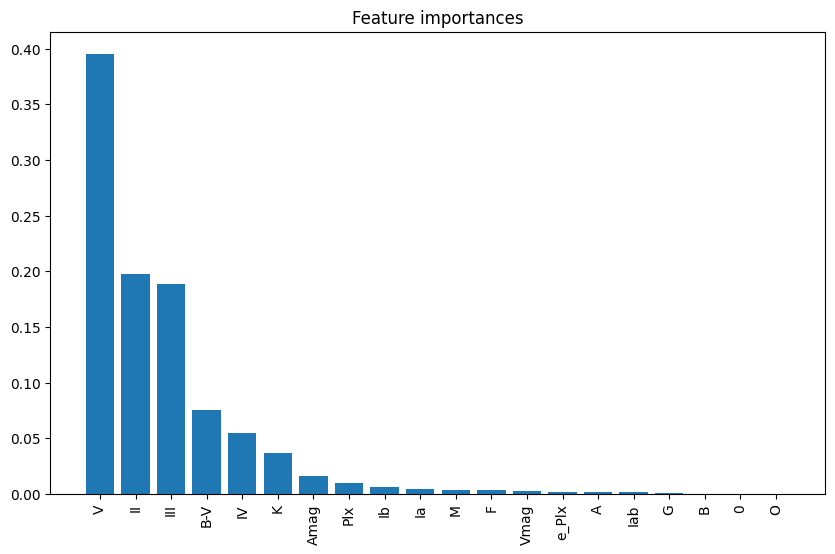

In [20]:
importances = model52.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f"{feat[indices[f]]}: {importances[indices[f]]}")

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feat[i] for i in indices], rotation=90)
plt.show()


In [21]:

sm = SMOTE(random_state=42)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

model52.fit(X_train_res, Y_train_res)
'''predictions52_res = model52.predict(X_test)

print(classification_report(Y_test, predictions52_res))
print(confusion_matrix(Y_test, predictions52_res))'''

<ipython-input-21-a768e7a31a7d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model52.fit(X_train_res, Y_train_res)


'predictions52_res = model52.predict(X_test)\n\nprint(classification_report(Y_test, predictions52_res))\nprint(confusion_matrix(Y_test, predictions52_res))'

In [24]:
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, Y_train)
#predictions_xgb = model_xgb.predict(X_test)

'''print(classification_report(Y_test, predictions_xgb))
print(confusion_matrix(Y_test, predictions_xgb))'''

'print(classification_report(Y_test, predictions_xgb))\nprint(confusion_matrix(Y_test, predictions_xgb))'

V: 0.9983696341514587
II: 0.0005485889851115644
Vmag: 0.00033537353738211095
e_Plx: 0.0003149069380015135
B-V: 0.00025064439978450537
Plx: 0.00014699406165163964
III: 2.125687024090439e-05
Amag: 1.2544821402116213e-05
F: 0.0
G: 0.0
M: 0.0
O: 0.0
Ib: 0.0
IV: 0.0
A: 0.0
K: 0.0
0: 0.0
Ia: 0.0
Iab: 0.0
B: 0.0


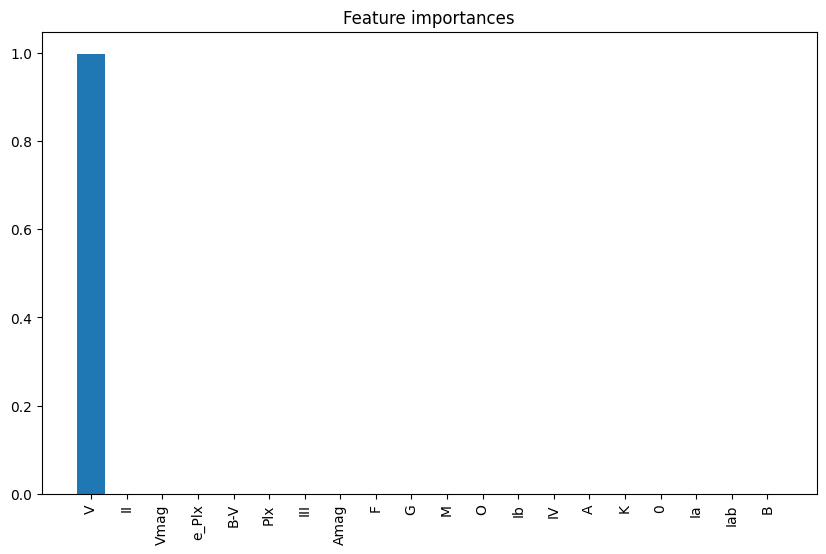

In [25]:
importances = model_xgb.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f"{feat[indices[f]]}: {importances[indices[f]]}")

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feat[i] for i in indices], rotation=90)
plt.show()


In [26]:
sm = SMOTE(random_state=42)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

model_xgb.fit(X_train_res, Y_train_res)
#predictions78_res = model_xgb.predict(X_test)

'''print(classification_report(Y_test, predictions78_res))
print(confusion_matrix(Y_test, predictions78_res))'''

'print(classification_report(Y_test, predictions78_res))\nprint(confusion_matrix(Y_test, predictions78_res))'

In [27]:
Z_test = data[feat]

In [28]:
predictionsZ = model.predict(Z_test)
predictionsZ

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
predictionsZ52 = model52.predict(Z_test)
predictionsZ52

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
predictionsZ78 = model_xgb.predict(Z_test)
predictionsZ78

array([0, 0, 0, ..., 0, 1, 0])

In [31]:
my_submition = pd.DataFrame(predictionsZ, columns=['TargetClass'])

my_submition.reset_index().to_csv('412.csv', index=False)
my_submition

,TargetClass
0,0
1,0
2,0
3,0
4,0
...,...
18815,0
18816,0
18817,0
18818,1


In [32]:
my_submition52 = pd.DataFrame(predictionsZ52, columns=['TargetClass'])

my_submition52.reset_index().to_csv('312.csv', index=False)
my_submition52

,TargetClass
0,0
1,0
2,0
3,0
4,0
...,...
18815,0
18816,0
18817,0
18818,1


In [33]:
my_submition78 = pd.DataFrame(predictionsZ78, columns=['TargetClass'])
my_submition78.reset_index().to_csv('212.csv', index=False)
my_submition78

,TargetClass
0,0
1,0
2,0
3,0
4,0
...,...
18815,0
18816,0
18817,0
18818,1
